In [1]:
%load_ext autoreload
%autoreload 2

from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import pmlb as dsets
import numpy as np
import pickle as pkl
from os.path import join as oj
from copy import deepcopy
import pandas as pd

# sklearn models
sys.path.append('../scores')
import scores
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

import interactions
from scipy import interpolate
from pdpbox import pdp, get_dataset, info_plots

In [2]:
data_dir = '/scratch/users/vision/data/pmlb'
out_dir = '/scratch/users/vision/chandan/pmlb'
dset_names = deepcopy(dsets.classification_dataset_names)
dset_names.remove('kddcup') # # remove biggest dset
dset_names.remove('mnist') # # remove biggest dset
dset_names.remove('poker') # # remove biggest dset

dset_names = np.array(dset_names)
random_state = 42 # for each train_test_split

# analyze results

In [23]:
results = pd.DataFrame(pkl.load(open(oj(out_dir, 'classification_results.pkl'), 'rb')))

['N14', 'N6', 'N10', 'N16', 'N8', 'N7', 'N2', 'N0', 'P2', 'N17', 'N5', 'N12', 'P1', 'N1', 'N9', 'N15', 'N11', 'N4', 'N13', 'N3']


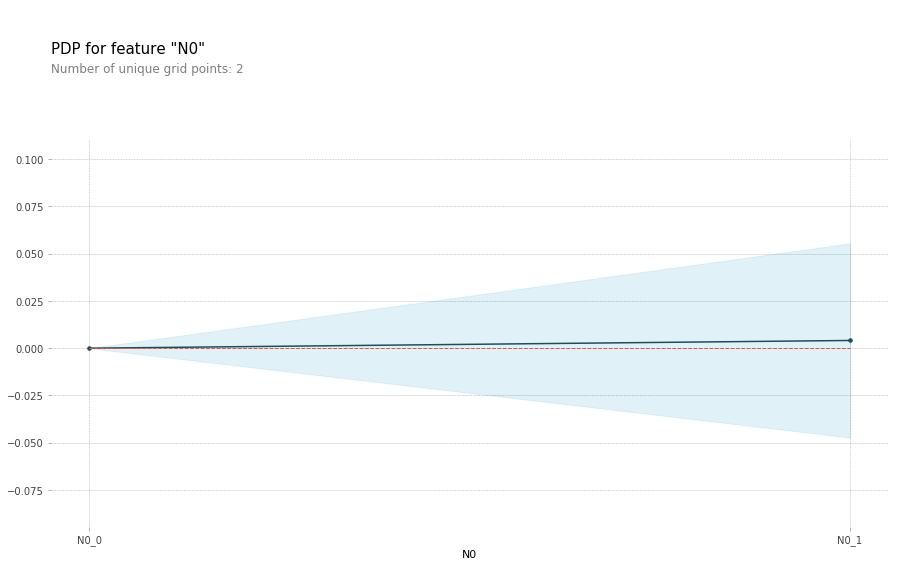

In [25]:
dset_num = 0
row = r.iloc[dset_num]    

dset_name = row.dset_name # results['dset_names'][idx_0] #dsets.classification_dataset_names[0]
# X, y = dsets.fetch_data(dset_name, return_X_y=True, 
#                   local_cache_dir=data_dir)
data = dsets.fetch_data(dset_name) #, return_X_y=True, local_cache_dir=data_dir)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=random_state)
num_features = X.shape[1]
rf = row.rf

feat_names = set(data.keys())
feat_names.remove('target')
feat_names = list(feat_names)
print(feat_names)

'''
fig, axes, summary_df = info_plots.actual_plot(
    model=rf, X=titanic_data[titanic_features],
    feature='Sex', feature_name='Sex')
'''


pdp_one = pdp.pdp_isolate(model=rf, # model
                          dataset=data,  # dataframe with the features
                          model_features=list(feat_names), # names of the features the model uses
                          feature='N0') # name of the feature to isolate

fig, axes = pdp.pdp_plot(pdp_isolate_out=pdp_one, feature_name='N0')

In [26]:
print(pdp_one)